In [6]:
import tensorflow as tf

## MNIST 数据集

![mnist](http://www.tensorfly.cn/tfdoc/images/MNIST.png)

In [7]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 模型

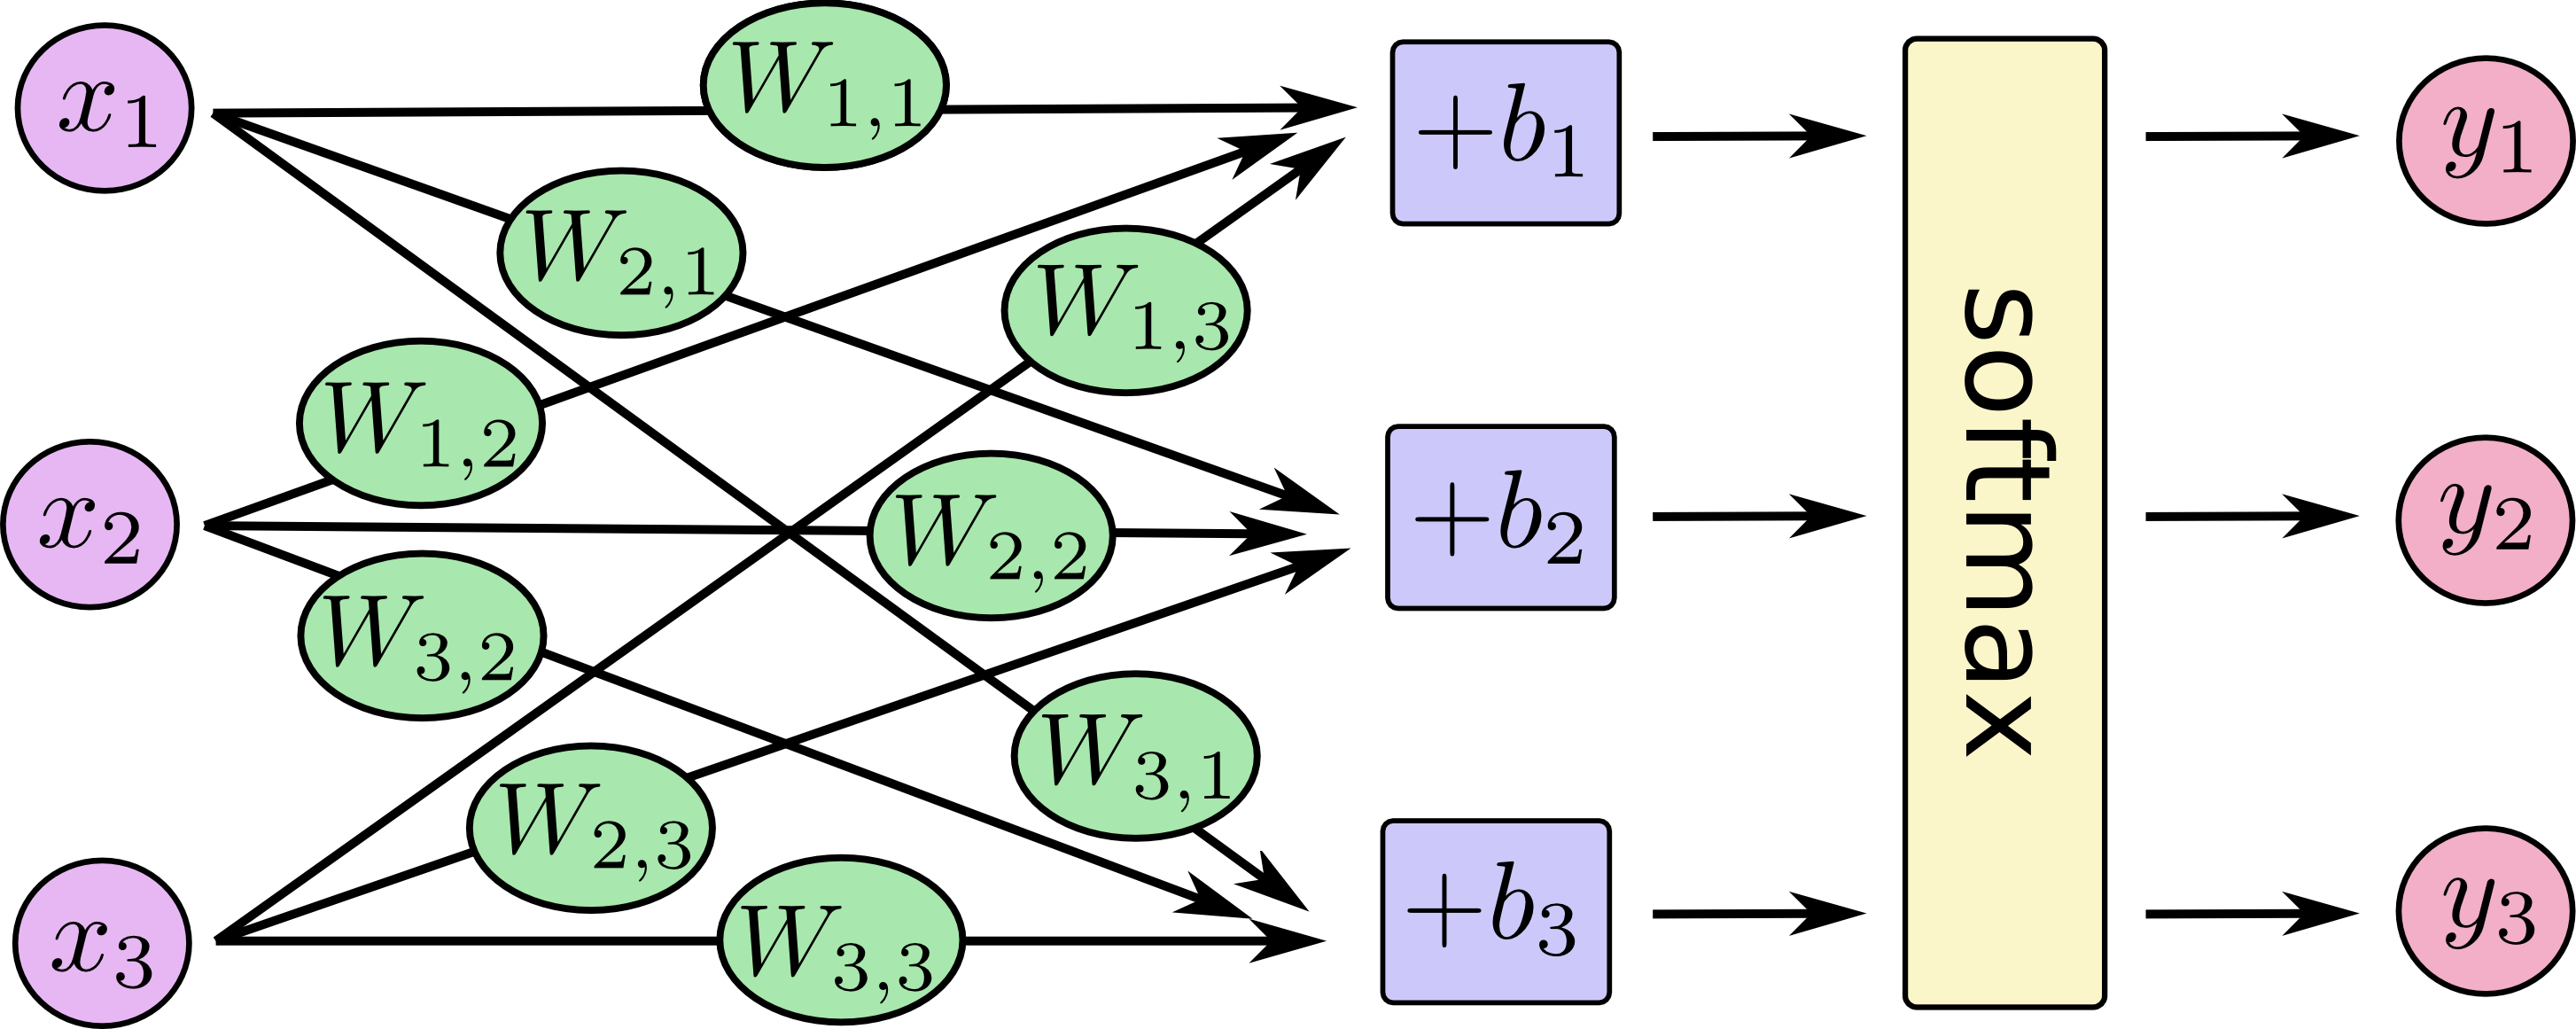

矩阵表示：

$$y=softmax(Wx+b)$$

In [3]:
x_input = tf.placeholder(tf.float32, [None, 784]) # 28 * 28
y_input = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_pred = tf.nn.softmax(tf.matmul(x_input, W) + b)

## 损失函数

使用交叉熵作为loss，交叉熵计算公式：


$$cross\_entropy=- \sum{y'\log(y)}$$

In [4]:
loss = -tf.reduce_sum(y_input * tf.log(y_pred))

## 训练模型

In [5]:
learning_rate = 0.01
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        batch_x_train, batch_y_train = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x_input: batch_x_train, y_input: batch_y_train})
        if i % 50 == 0:
            print(sess.run(loss, feed_dict={x_input: batch_x_train, y_input: batch_y_train}))
            
    correct_prediction = tf.equal(tf.argmax(y_input, 1), tf.argmax(y_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('accuracy:',sess.run(accuracy,  feed_dict={x_input: mnist.test.images, y_input: mnist.test.labels}))

150.77322
23.781134
14.859889
31.690578
29.933033
48.44466
31.441957
29.12793
20.21436
15.521226
16.82789
11.919761
22.752966
12.613387
9.624102
19.36353
28.84849
21.362041
22.56748
18.74545
accuracy: 0.916
